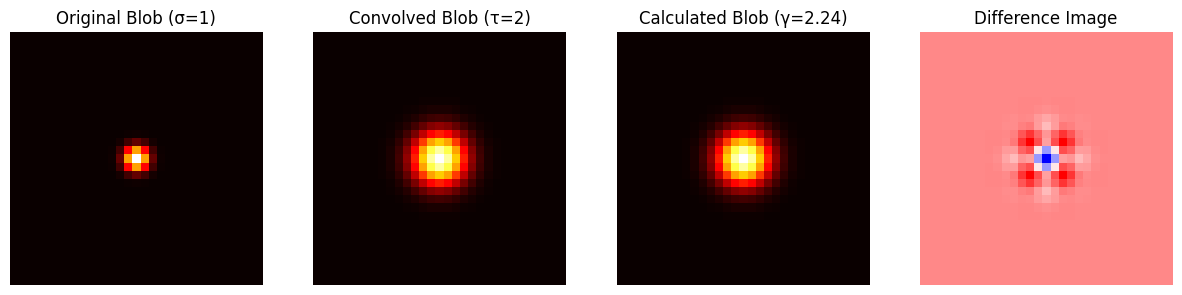

In [3]:
#4.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 1. Define the 2D Gaussian function
def gaussian(x, y, sigma):
    """Compute the 2D Gaussian distribution."""
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# 2. Generate a blob image using the Gaussian function
def model_blob_image(x, y, sigma):
    """Generate a synthetic blob image using a 2D Gaussian."""
    return gaussian(x, y, sigma)

# 3. Apply Gaussian convolution to the blob image
def convolve_blob_image(original_blob, gaussian_filter):
    """Compute the Gaussian-blurred blob image using 2D convolution."""
    return convolve2d(original_blob, gaussian_filter, mode='same')

# Define grid range for the image
grid_size = 30  # Use a 30x30 grid
x = np.arange(-grid_size // 2, grid_size // 2 + 1)
y = np.arange(-grid_size // 2, grid_size // 2 + 1)
x_coords, y_coords = np.meshgrid(x, y)

# Generate the initial blob image with sigma = 1
sigma = 1
blob_image_original = model_blob_image(x_coords, y_coords, sigma)

# Generate the Gaussian filter for convolution with tau = 2
tau = 2
gaussian_filter = model_blob_image(x_coords, y_coords, tau)

# Compute the convolved blob image
blob_image_convolved = convolve_blob_image(blob_image_original, gaussian_filter)

# Compute the theoretical Gaussian scale gamma = sqrt(sigma^2 + tau^2)
gamma = np.sqrt(sigma**2 + tau**2)
blob_image_calculated = model_blob_image(x_coords, y_coords, gamma)

# Compute the difference image between calculated and convolved blobs
difference_image = blob_image_calculated - blob_image_convolved

# Visualization of results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(blob_image_original, cmap='hot', interpolation='nearest')
axes[0].set_title(f"Original Blob (σ={sigma})")

axes[1].imshow(blob_image_convolved, cmap='hot', interpolation='nearest')
axes[1].set_title(f"Convolved Blob (τ={tau})")

axes[2].imshow(blob_image_calculated, cmap='hot', interpolation='nearest')
axes[2].set_title(f"Calculated Blob (γ={gamma:.2f})")

axes[3].imshow(difference_image, cmap='bwr', interpolation='nearest')
axes[3].set_title("Difference Image")

for ax in axes:
    ax.axis('off')  # Remove axis labels for better visualization

plt.show()


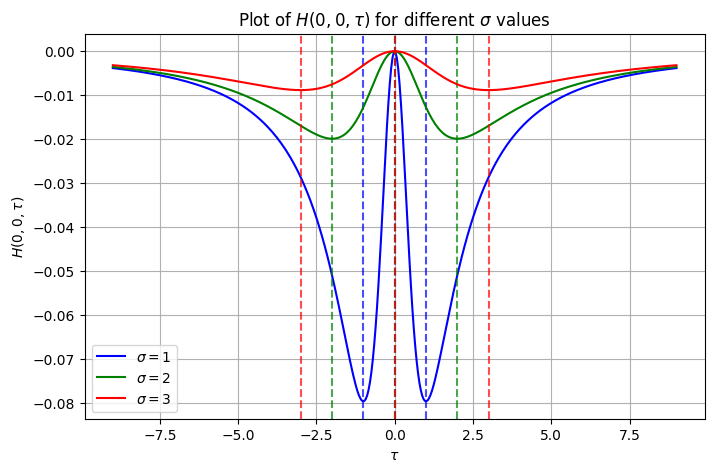

In [9]:
#4.3 - 3
sigma_values = [ 1, 2,3]

tau_values = np.linspace(-3 * max(sigma_values), 3 * max(sigma_values), 400)

plt.figure(figsize=(8, 5))

colors = ['b', 'g', 'r']
for i, sigma in enumerate(sigma_values):
    H_values = H_0_0_tau(tau_values, sigma)
    plt.plot(tau_values, H_values, label=rf"$\sigma = {sigma}$", color=colors[i])

    plt.axvline(x=0, linestyle='--', color=colors[i], alpha=0.7)
    plt.axvline(x=sigma, linestyle='--', color=colors[i], alpha=0.7)
    plt.axvline(x=-sigma, linestyle='--', color=colors[i], alpha=0.7)

plt.xlabel(r"$\tau$")
plt.ylabel(r"$H(0,0,\tau)$")
plt.title(r"Plot of $H(0,0,\tau)$ for different $\sigma$ values")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/0b/82_cwnms257cfbp83l0l08h00000gn/T/ipykernel_36802/752903709.py:33: RuntimeWarning: overflow encountered in scalar negative
  blobs.sort(key=lambda b: -abs(b[3]))


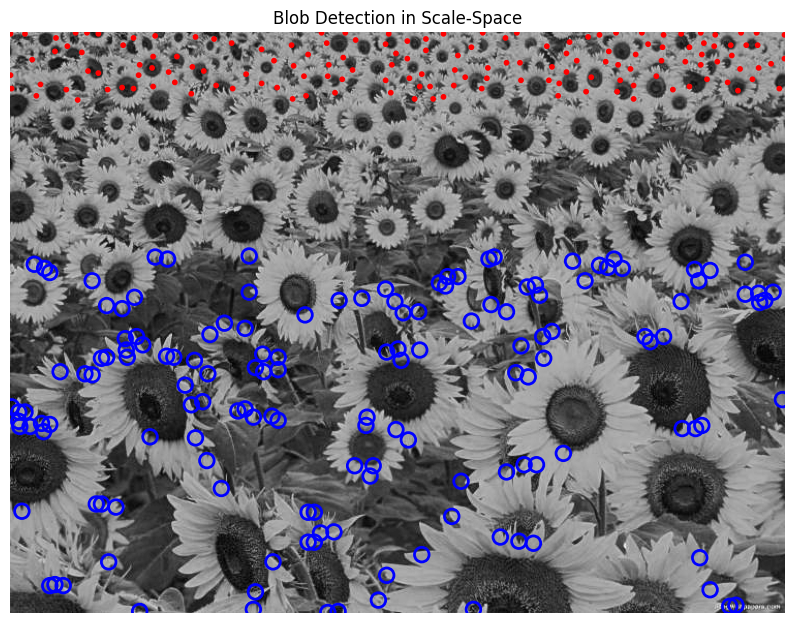

In [26]:
#4.4
from skimage import io, feature, color
from scipy.ndimage import gaussian_filter

image = io.imread("../TestImages/Week 1/sunflower.tiff")

if image.ndim == 3:
    image = color.rgb2gray(image)

# Define parameters
sigma_values = [1, 2, 3, 4, 5]  # Different scales for detection
gamma = 1
num_blobs = 150
blobs = []

# Compute the scale-normalized Laplacian and detect extrema
for sigma in sigma_values:
    H = sigma**(2 * gamma) * (gaussian_filter(image, sigma=sigma, order=(2, 0)) +
                              gaussian_filter(image, sigma=sigma, order=(0, 2)))

    # Detect local maxima and minima
    maxima = feature.peak_local_max(H, min_distance=10, threshold_abs=0.02, exclude_border=False)
    minima = feature.peak_local_max(-H, min_distance=5, threshold_abs=0.01, exclude_border=False)

    # Store detected points with their scale
    for y, x in maxima:
        blobs.append((y, x, sigma, H[y, x]))
    for y, x in minima:
        blobs.append((y, x, sigma, H[y, x]))

# Sort blobs by absolute response value and select the strongest
blobs.sort(key=lambda b: -abs(b[3]))
blobs_maxima = blobs[:num_blobs]
blobs_minima = blobs[-num_blobs:]


plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.axis("off")

# Ensure blobs_maxima and blobs_minima are computed before this
for y, x, sigma, _ in blobs_maxima:
    # plt.scatter(x, y, c="red", s=10)  # Add a dot at the center
    plt.gca().add_patch(plt.Circle((x, y), sigma * np.sqrt(2), color="red", linewidth=2, fill=False))

for y, x, sigma, _ in blobs_minima:
    # plt.scatter(x, y, c="blue", s=10)  # Add a dot at the center
    plt.gca().add_patch(plt.Circle((x, y), sigma * np.sqrt(2), color="blue", linewidth=2, fill=False))


plt.title("Blob Detection in Scale-Space")
plt.show()
